# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

import pickle

# Read in Data

In [2]:
#low_memory must be False else errors occur.
## change this csv file for an updated dataset should a new dataset want to be used.
df = pd.read_csv('openpowerlifting-2023-01-14-f5f667d4.csv',low_memory=False)

# View Dataset

In [3]:
#show the full width of the dataframe
pd.options.display.max_columns = None

#df.head(10) #displays top 10 rows
#from top 10 rows, visable errors for < 5 years

df.loc[df['Age'] <5] #only show people under 5 years to confirm errors

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
37973,Noah Caola,M,D,Raw,4.0,NaN,NaN,Youth 11 & Under,19.82,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,1,13.98,14.69,14.57,NaN,Yes,USA,PA,RAW,NaN,2014-02-22,USA,PA,Hooversville,Scrappy Joe's
38945,Seth Watson,M,D,Raw,4.5,5-12,NaN,Youth,21.90,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,30.0,NaN,30.0,30.0,1,38.13,40.06,39.73,NaN,Yes,NaN,NaN,RAW-CAN,NaN,2016-05-14,Canada,BC,Vernon,Vernon Classic
45682,Addison Price,F,D,Raw,4.0,NaN,NaN,Youth,44.00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,21.0,22.0,NaN,22.0,22.0,4,30.30,30.98,27.79,NaN,Yes,NaN,NaN,RAW-CAN,NaN,2012-02-11,Canada,AB,Okotoks,Canadian Challenge - Okotoks
83981,Andres Galvez,M,SBD,Single-ply,0.5,NaN,NaN,Open,100.40,110,-200.0,210.0,-245.0,NaN,210.0,110.0,130.0,140.0,NaN,140.0,220.0,250.0,270.0,NaN,270.0,620.0,1,380.96,376.73,359.79,64.71,Yes,Spain,NaN,IBSA,NaN,2000-11-26,Netherlands,NaN,Arnhem,World Powerlifting Championships
154595,Konstantin Silin,M,B,Raw,3.5,NaN,NaN,Pro Open,108.00,110,NaN,NaN,NaN,NaN,NaN,200.0,210.0,-215.0,NaN,210.0,NaN,NaN,NaN,NaN,NaN,210.0,1,125.25,124.30,118.74,92.82,NaN,Russia,NaN,WPC-RUS,WPC,2012-11-17,Russia,AMU,Blagoveshchensk,Far East Cup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244215,Hayden Cook,M,SBD,Single-ply,3.0,NaN,NaN,Open,125.00,125,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,205.0,445.0,3,252.21,253.58,242.67,42.36,Yes,Australia,NaN,PA,IPF,2000-04-15,Australia,VIC,Melbourne,Victorian Championships
2245375,Zac Edwards,M,B,Raw,2.5,NaN,NaN,Under 14,43.00,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.5,NaN,NaN,NaN,NaN,NaN,22.5,6,26.26,27.41,27.20,16.24,Yes,USA,NaN,PA,IPF,2004-01-01,Australia,NaN,NaN,Australian Schools Bench Press Competition
2246672,Zac Fleming,M,B,Raw,1.5,NaN,NaN,Under 16,75.00,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.5,NaN,NaN,NaN,NaN,NaN,67.5,2,48.43,48.10,46.47,35.74,Yes,NaN,NaN,PA,IPF,2001-01-01,Australia,NaN,NaN,Victorian Schools Bench Press
2802271,Christer Johansson,M,SBD,Single-ply,0.5,NaN,NaN,Open,82.50,82.5,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN,302.5,727.5,5,492.80,487.36,468.93,84.31,Yes,Sweden,NaN,IPF,IPF,1987-11-12,Norway,NaN,Fredrikstad,Men's World Powerlifting Championships


In [4]:
#display information about the dataframes columns and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838796 entries, 0 to 2838795
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

We can see that there are in total 2,838,796 entries with 41 variables to use

# Clean Dataset

In [5]:
#gets NaN values, stores in a series, coverts to df
before_nan_count = df.isna().sum().to_frame()

In [6]:
#drop un-needed columns (reference numbers above to see which columns were dropped)
df_dropped = df.drop(df.columns[[0,6,32,33,34,35,36,37,38,39,40]], axis=1) #axis 1 is column

In [7]:
#drop invalid values for columns used in calculations
df_copy = df_dropped.copy() 
df_copy = df_copy.dropna(subset=["Sex","BodyweightKg","Best3SquatKg","Tested","Best3BenchKg","Best3DeadliftKg","TotalKg","Age"])
df_copy = df_copy[df_copy['Age'] > 5] #only use older than 5 years old athletes
df_copy = df_copy[df_copy['Best3SquatKg'] > 0] #only +ve value squat, bench and deadlift as -ve values are invalid lifts
df_copy = df_copy[df_copy['Best3BenchKg'] > 0]
df_copy = df_copy[df_copy['Best3DeadliftKg'] > 0]
df_copy = df_copy[df_copy['Tested'] != "No"] #only use tested athletes (no steroid use)
df_copy = df_copy[df_copy['Equipment'] == "Raw"] #no extra equiptment for assistance

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838796 entries, 0 to 2838795
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

# Analysis of data after dropped values

                 Before Dropped Values  After Dropped Values
Sex                                  0                     0
Event                                0                     0
Equipment                            0                     0
Age                            1047721                     0
AgeClass                        795102                     0
Division                          1429                     0
BodyweightKg                     36800                     0
WeightClassKg                    36098                  2122
Squat1Kg                       2076867                 91955
Squat2Kg                       2085272                 94025
Squat3Kg                       2106570                 99946
Squat4Kg                       2831047                409348
Best3SquatKg                    957618                     0
Bench1Kg                       1618456                 91964
Bench2Kg                       1632992                 93566
Bench3Kg                

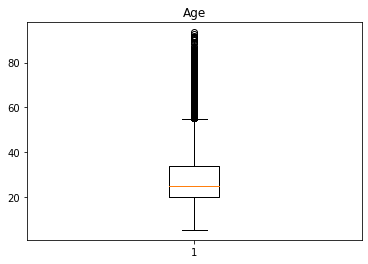

lower quartile: 20.0
median: 25.0
upper quartile: 34.0


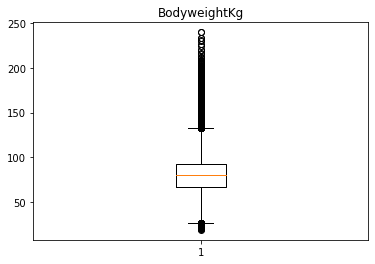

lower quartile: 66.0
median: 80.4
upper quartile: 92.6


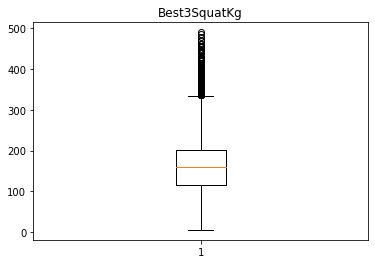

lower quartile: 115.0
median: 160.0
upper quartile: 202.5


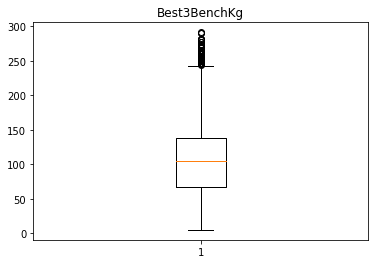

lower quartile: 67.5
median: 105.0
upper quartile: 137.5


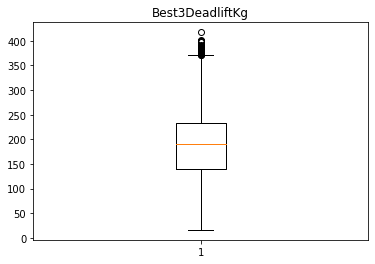

lower quartile: 140.0
median: 190.0
upper quartile: 232.5


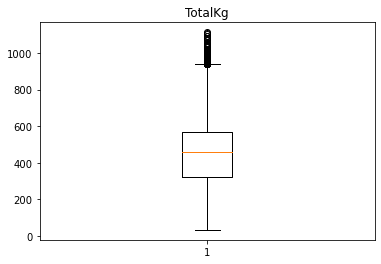

lower quartile: 325.0
median: 460.0
upper quartile: 570.0


In [8]:
#merging before and after nan values
after_nan_count = df_copy.isna().sum().to_frame()
merged_nan_count = pd.merge(before_nan_count,after_nan_count,left_index=True,right_index=True)
merged_nan_count = merged_nan_count.rename(columns={"0_x":"Before Dropped Values","0_y":"After Dropped Values"})
print(merged_nan_count) #table of counted values before and after dropping invalid data

#boxplots and values for certain columns:
analyse_cols = ["Age","BodyweightKg","Best3SquatKg","Best3BenchKg","Best3DeadliftKg","TotalKg"]
for col in analyse_cols:
    plt.boxplot(df_copy[col])
    plt.title(col)
    plt.show()
    quartiles = np.percentile(df_copy[col], [25, 50, 75])
    print(f"lower quartile: {quartiles[0]}")
    print(f"median: {quartiles[1]}")
    print(f"upper quartile: {quartiles[2]}")





In [9]:
print(df_copy['Age'].value_counts().sort_index()) #confirm under 5 years is dropped

5.5      1
6.0     18
6.5      9
7.0     38
7.5     37
        ..
91.0     2
91.5     3
92.0     1
92.5     1
93.5     1
Name: Age, Length: 172, dtype: int64


In [10]:
#variables from columns to use in predictions and graphs
bw = df_copy["BodyweightKg"]
squat = df_copy["Best3SquatKg"]
bench = df_copy["Best3BenchKg"]
dead = df_copy["Best3DeadliftKg"]
wilks = df_copy["Wilks"]
WC = df_copy["WeightClassKg"]
totalKG = df_copy["TotalKg"]
age = df_copy["Age"]

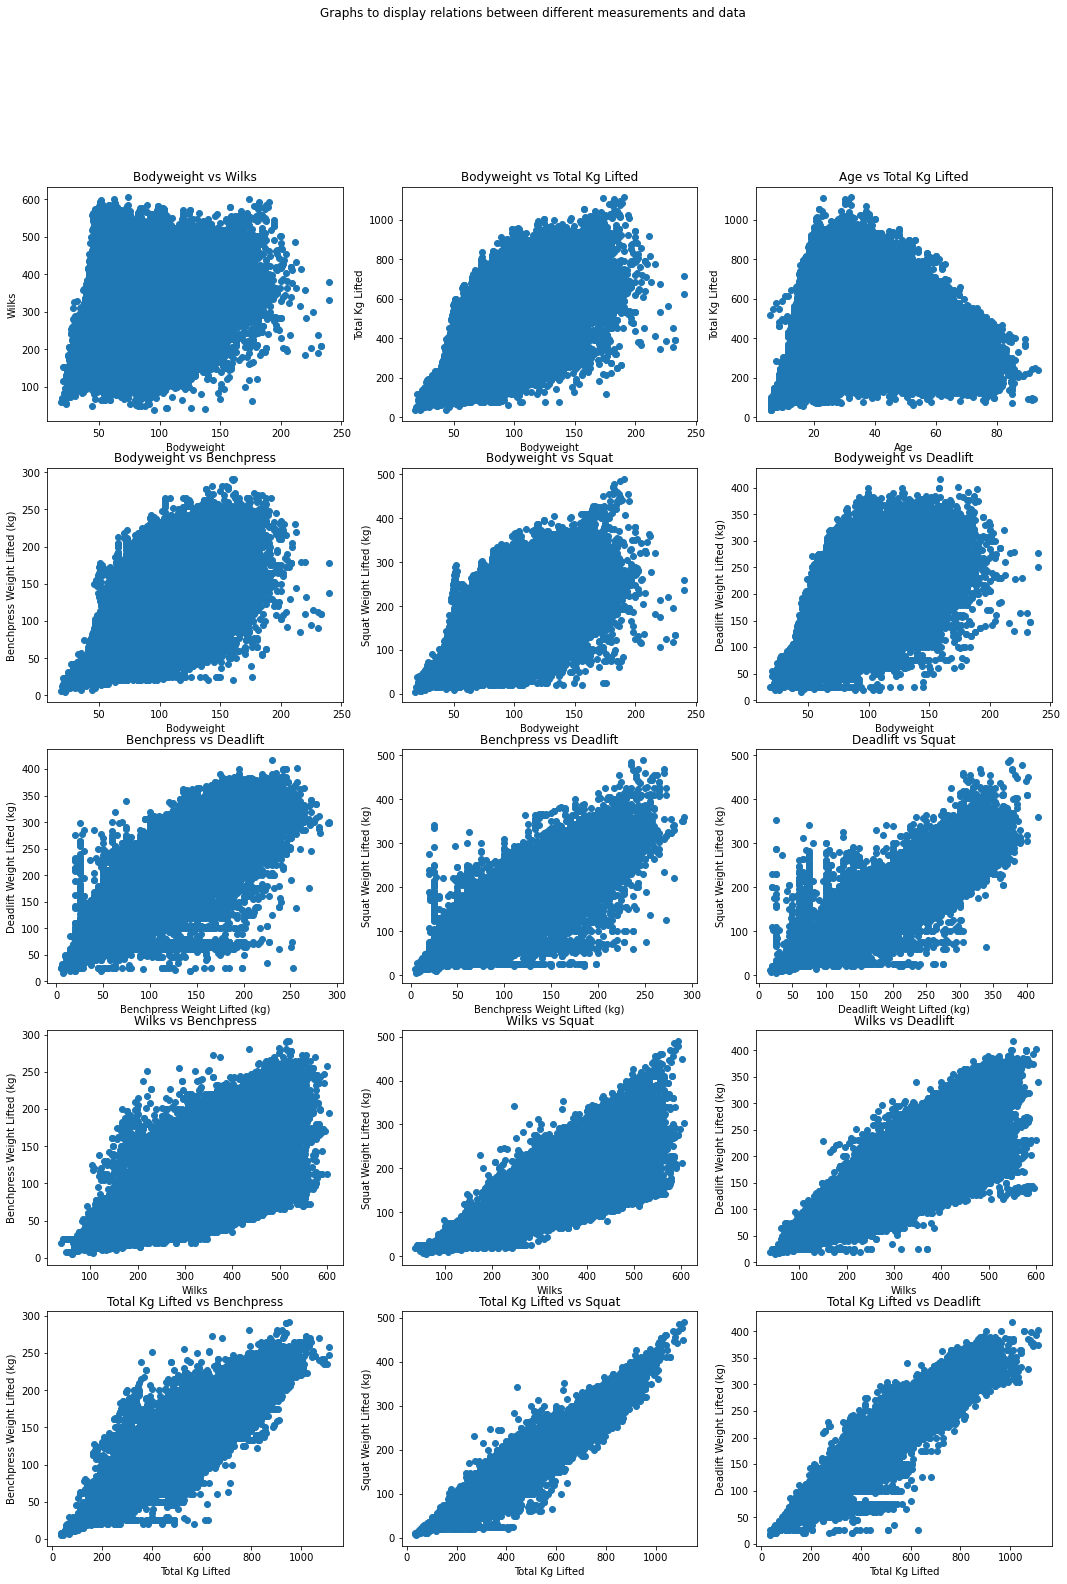

In [11]:
#grid to show multiple plots easily
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(18, 25)
fig.suptitle("Graphs to display relations between different measurements and data")

#bodyweight, wilks
axs[0,0].scatter(bw, wilks)
axs[0,0].set_title("Bodyweight vs Wilks")
axs[0,0].set_xlabel('Bodyweight')
axs[0,0].set_ylabel('Wilks')

#bodyweight, totalKG
axs[0,1].scatter(bw, totalKG)
axs[0,1].set_title("Bodyweight vs Total Kg Lifted")
axs[0,1].set_xlabel('Bodyweight')
axs[0,1].set_ylabel('Total Kg Lifted')

axs[0,2].scatter(age, totalKG)
axs[0,2].set_title("Age vs Total Kg Lifted")
axs[0,2].set_xlabel("Age")
axs[0,2].set_ylabel("Total Kg Lifted")

#bodyweight, bench
axs[1,0].scatter(bw, bench)
axs[1,0].set_title("Bodyweight vs Benchpress")
axs[1,0].set_xlabel('Bodyweight')
axs[1,0].set_ylabel('Benchpress Weight Lifted (kg)')

#bodyweight, squat
axs[1,1].scatter(bw, squat)
axs[1,1].set_title("Bodyweight vs Squat")
axs[1,1].set_xlabel('Bodyweight')
axs[1,1].set_ylabel('Squat Weight Lifted (kg)')

#bodyweight, deadlift
axs[1,2].scatter(bw, dead)
axs[1,2].set_title("Bodyweight vs Deadlift")
axs[1,2].set_xlabel('Bodyweight')
axs[1,2].set_ylabel('Deadlift Weight Lifted (kg)')

#bench, deadlift
axs[2,0].scatter(bench, dead)
axs[2,0].set_title("Benchpress vs Deadlift")
axs[2,0].set_xlabel('Benchpress Weight Lifted (kg)')
axs[2,0].set_ylabel('Deadlift Weight Lifted (kg)')

#bench, squat
axs[2,1].scatter(bench, squat)
axs[2,1].set_title("Benchpress vs Deadlift")
axs[2,1].set_xlabel('Benchpress Weight Lifted (kg)')
axs[2,1].set_ylabel('Squat Weight Lifted (kg)')

#dead, squat
axs[2,2].scatter(dead, squat)
axs[2,2].set_title("Deadlift vs Squat")
axs[2,2].set_xlabel('Deadlift Weight Lifted (kg)')
axs[2,2].set_ylabel('Squat Weight Lifted (kg)')

#wilks, bench
axs[3,0].scatter(wilks, bench)
axs[3,0].set_title("Wilks vs Benchpress")
axs[3,0].set_xlabel('Wilks')
axs[3,0].set_ylabel('Benchpress Weight Lifted (kg)')

#wilks, squat
axs[3,1].scatter(wilks, squat)
axs[3,1].set_title("Wilks vs Squat")
axs[3,1].set_xlabel('Wilks')
axs[3,1].set_ylabel('Squat Weight Lifted (kg)')

#wilks, deadlift
axs[3,2].scatter(wilks, dead)
axs[3,2].set_title("Wilks vs Deadlift")
axs[3,2].set_xlabel('Wilks')
axs[3,2].set_ylabel('Deadlift Weight Lifted (kg)')

#Totalkg, bench
axs[4,0].scatter(totalKG, bench)
axs[4,0].set_title("Total Kg Lifted vs Benchpress")
axs[4,0].set_xlabel('Total Kg Lifted')
axs[4,0].set_ylabel('Benchpress Weight Lifted (kg)')

#Totalkg, squat
axs[4,1].scatter(totalKG, squat)
axs[4,1].set_title("Total Kg Lifted vs Squat")
axs[4,1].set_xlabel('Total Kg Lifted')
axs[4,1].set_ylabel('Squat Weight Lifted (kg)')

#Totalkg, deadlift
axs[4,2].scatter(totalKG, dead)
axs[4,2].set_title("Total Kg Lifted vs Deadlift")
axs[4,2].set_xlabel('Total Kg Lifted')
axs[4,2].set_ylabel('Deadlift Weight Lifted (kg)')


plt.show()

We can see from the above graphs that between many variables, there is a strong positive linear correlation. This will be good for Multiple Linear Regression.

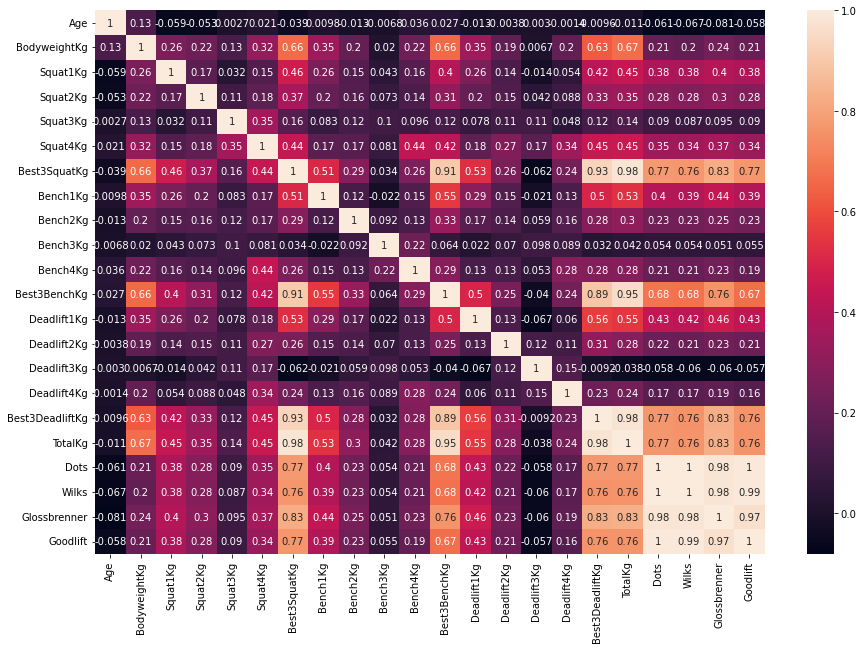

In [12]:
#correlation matrix
corr_matrix = df_copy.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True, ax=ax)
plt.show()

In [13]:
#Display a random set of 10 samples to confirm data is cleaned.
df_copy.sample(n=10)

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested
341253,F,SBD,Raw,31.5,24-34,FR-O,70.9,72,135.0,142.5,150.0,NaN,150.0,80.0,-82.5,NaN,NaN,80.0,150.0,160.0,-165.0,NaN,160.0,390.0,2,391.59,384.61,338.93,79.61,Yes
334213,F,SBD,Raw,33.5,24-34,FR-O,68.0,69,97.5,102.5,107.5,NaN,107.5,55.0,60.0,62.5,NaN,62.5,135.0,140.0,145.0,NaN,145.0,315.0,1,323.83,319.81,282.08,65.80,Yes
2252490,F,SBD,Raw,26.5,24-34,Open,71.0,72,87.5,95.0,100.0,NaN,100.0,47.5,52.5,-55.0,NaN,52.5,107.5,117.5,-125.0,NaN,117.5,270.0,4,270.89,266.02,234.41,55.08,Yes
382189,F,SBD,Raw,30.5,24-34,FR-O,50.7,52,87.5,92.5,-97.5,NaN,92.5,62.5,67.5,70.0,NaN,70.0,90.0,95.0,-97.5,NaN,95.0,257.5,1,319.48,327.31,290.44,66.47,Yes
1490512,M,SBD,Raw,22.5,20-23,Juniors,65.2,66,180.0,190.0,195.0,NaN,195.0,125.0,132.5,137.5,NaN,137.5,195.0,205.0,207.5,NaN,207.5,540.0,1,426.97,428.31,416.43,84.72,Yes
1925752,M,SBD,Raw,45.0,45-49,Open,66.5,67.5,195.0,-202.5,207.5,NaN,207.5,112.5,120.0,-125.0,NaN,120.0,190.0,202.5,210.0,NaN,210.0,537.5,7,418.81,419.44,407.43,83.45,Yes
193335,M,SBD,Raw,31.5,24-34,Amateur Open,86.2,90,180.0,200.0,210.0,NaN,210.0,120.0,132.5,-135.0,NaN,132.5,200.0,-235.0,NaN,NaN,200.0,542.5,1,358.72,354.35,340.27,73.68,Yes
2374411,M,SBD,Raw,20.5,20-23,M-O,102.4,105,NaN,NaN,NaN,NaN,260.0,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,NaN,285.0,680.0,1,414.35,410.05,391.55,84.95,Yes
416610,M,SBD,Raw,42.5,40-44,MR-M1a,86.5,93,110.0,115.0,-122.5,NaN,115.0,82.5,87.5,-92.5,NaN,87.5,155.0,162.5,170.0,NaN,170.0,372.5,2,245.85,242.85,233.16,50.51,Yes
292590,M,SBD,Raw,28.5,24-34,Open,72.4,74,155.0,-160.0,162.5,NaN,162.5,110.0,115.0,-120.0,NaN,115.0,-190.0,190.0,-200.0,NaN,190.0,467.5,1,343.21,341.62,330.58,69.42,Yes


# OHE coding

In [14]:
#display how many Male/Female entries
print(df_copy['Sex'].value_counts())

M     274743
F     136080
Mx        18
Name: Sex, dtype: int64


We can see 274,743 Male samples and 136,080 Female samples. Too many samples to disregard so they will be used through OHE

In [15]:
encoder = LabelEncoder()
#add OHE values to new column
df_copy["Sex1"] = encoder.fit_transform(df_copy["Sex"])

df_copy.iloc[:,-1] = df_copy.iloc[:,-1].replace({1:100, 0:10}) #100 is male, 10 is female
df_copy.head(15)

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Sex1
0,F,SBD,Raw,33.0,24-34,O,58.30,60,75.0,80.0,-90.0,NaN,80.0,50.0,55.0,60.0,NaN,60.0,95.0,105.0,107.5,NaN,107.5,247.5,1,279.44,282.18,249.42,57.10,Yes,10
1,F,SBD,Raw,43.0,40-44,M1,73.10,75,95.0,100.0,105.0,NaN,105.0,62.5,67.5,-72.5,NaN,67.5,100.0,110.0,-120.0,NaN,110.0,282.5,1,278.95,272.99,240.35,56.76,Yes,10
2,M,SBD,Raw,15.5,16-17,T,67.40,75,85.0,90.0,100.0,NaN,100.0,55.0,62.5,-65.0,NaN,62.5,90.0,100.0,105.0,NaN,105.0,267.5,1,206.40,206.49,200.45,41.24,Yes,100
3,M,SBD,Raw,35.0,35-39,O,66.65,75,125.0,132.0,137.5,NaN,137.5,115.0,122.5,-127.5,NaN,122.5,150.0,165.0,170.0,NaN,170.0,430.0,1,334.49,334.94,325.32,66.68,Yes,100
4,M,SBD,Raw,26.5,24-34,O,72.45,75,80.0,85.0,90.0,NaN,90.0,40.0,50.0,-60.0,NaN,50.0,112.5,120.0,125.0,NaN,125.0,265.0,1,194.46,193.55,187.29,39.34,Yes,100
5,M,SBD,Raw,15.5,16-17,T,78.80,85,90.0,-95.0,100.0,NaN,100.0,60.0,-65.0,-67.5,NaN,60.0,90.0,105.0,115.0,NaN,115.0,275.0,1,191.34,189.56,182.77,39.09,Yes,100
6,M,SBD,Raw,57.5,55-59,M2,79.65,85,50.0,150.0,180.0,NaN,180.0,50.0,100.0,-110.0,NaN,100.0,55.0,NaN,NaN,NaN,55.0,335.0,1,231.60,229.34,221.02,47.35,Yes,100
7,F,SBD,Raw,26.0,24-34,O,96.50,105,85.0,95.0,100.0,NaN,100.0,40.0,47.5,-50.0,NaN,47.5,115.0,130.0,140.0,NaN,140.0,287.5,1,248.84,242.04,208.84,51.79,Yes,10
70,F,SBD,Raw,35.0,35-39,O,53.60,55,70.0,75.0,80.0,NaN,80.0,47.5,50.0,-52.5,NaN,50.0,80.0,87.5,92.5,NaN,92.5,222.5,1,265.61,270.92,239.91,54.77,Yes,10
71,M,SBD,Raw,32.0,24-34,O,94.10,95,180.0,-205.0,205.0,NaN,205.0,130.0,145.0,-155.0,NaN,145.0,220.0,240.0,250.0,NaN,250.0,600.0,1,379.62,374.84,358.61,78.04,Yes,100


# Making Models


In [16]:
#first split for squat model

#predictor variables
X = df_copy[["Best3BenchKg","Best3DeadliftKg","BodyweightKg","Age","Sex1"]]
#variable to be predicted
y = df_copy["Best3SquatKg"]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model = make_pipeline(StandardScaler(with_mean=False), LinearRegression()) #using StandardScaler for normalisation
#model = LinearRegression(normalize=True) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

pred_df = pd.DataFrame(list(zip(y_test, y_pred, y_test-y_pred)), columns=["Actual Values", "Predicted Values","Difference"])

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("r2 Score: ",r2_score(y_test,y_pred))
pred_df.head(20)

Mean Squared Error:  310.68543701820715
r2 Score:  0.9065198169121057


,Actual Values,Predicted Values,Difference
0,127.0,144.718041,-17.718041
1,185.0,194.958508,-9.958508
2,210.0,188.133971,21.866029
3,85.0,83.346837,1.653163
4,187.5,193.709545,-6.209545
5,167.5,155.175414,12.324586
6,122.5,119.818921,2.681079
7,152.5,153.534865,-1.034865
8,207.5,194.121369,13.378631
9,72.5,71.426241,1.073759


In [17]:
#validation set of split of squat model

X1 = df_copy[["Best3BenchKg","Best3DeadliftKg","BodyweightKg","Age","Sex1"]]
y1 = df_copy["Best3SquatKg"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=42)

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)

val_score1 = model1.score(X_val1, y_val1)
print("Validation R^2 score:", val_score1)

test_score1 = model1.score(X_test1, y_test1)
print("Test R^2 score:", test_score1)

print("Model Coefficient: ",model1.coef_)
print("Model Intercept: ",model1.intercept_ )

y_pred1 = model.predict(X_test1)

print("Mean Squared Error: ",mean_squared_error(y_test1, y_pred1))
print("r2 Score: ",r2_score(y_test1,y_pred1))

pred_df1 = pd.DataFrame(list(zip(y_test1, y_pred1, y_test1-y_pred1)), columns=["Actual Values", "Predicted Values","Difference"])
pred_df1.head(20)

Validation R^2 score: 0.9068649197974394
Test R^2 score: 0.9058833102257138
Model Coefficient:  [ 0.49597113  0.59499505  0.22841687 -0.28082879 -0.10201938]
Model Intercept:  -6.690797907730513
Mean Squared Error:  310.79920978141655
r2 Score:  0.9058851121583786


,Actual Values,Predicted Values,Difference
0,240.0,236.842074,3.157926
1,125.0,139.390459,-14.390459
2,135.0,114.132803,20.867197
3,185.0,178.263338,6.736662
4,225.0,228.639863,-3.639863
5,75.0,106.903494,-31.903494
6,140.0,142.794240,-2.794240
7,90.0,90.130496,-0.130496
8,145.0,130.735686,14.264314
9,92.5,108.048915,-15.548915


In [18]:
#creating benchpress model

X_bench = df_copy[["Best3SquatKg","Best3DeadliftKg","BodyweightKg","Age","Sex1"]]
y_bench = df_copy["Best3BenchKg"]
X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y_bench, test_size=0.3)

model_bench = LinearRegression(normalize=True)
model_bench.fit(X_train_bench, y_train_bench)

y_pred_bench = model_bench.predict(X_test_bench)

pred_df_bench = pd.DataFrame(list(zip(y_test_bench, y_pred_bench, y_test_bench-y_pred_bench)), columns=["Actual Values", "Predicted Values","Difference"])

print("Mean Squared Error: ",mean_squared_error(y_test_bench, y_pred_bench))
print("r2 Score: ",r2_score(y_test_bench,y_pred_bench))
print("Model Coefficient: ",model_bench.coef_)
print("Model Intercept: ",model_bench.intercept_ )

pred_df_bench.head(20)

Mean Squared Error:  231.76557266480583
r2 Score:  0.8691193614775308
Model Coefficient:  [0.37794824 0.15729276 0.16371184 0.18381473 0.20773133]
Model Intercept:  -18.787028685635917


C:\Users\Jackr\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,Actual Values,Predicted Values,Difference
0,125.0,118.772544,6.227456
1,47.5,49.838531,-2.338531
2,167.5,149.415950,18.084050
3,65.0,69.570267,-4.570267
4,135.0,144.726932,-9.726932
5,160.0,160.059812,-0.059812
6,67.5,61.066305,6.433695
7,42.5,49.010379,-6.510379
8,195.0,206.437871,-11.437871
9,67.5,64.376892,3.123108


In [19]:
#creating deadlift model

X_deadlift = df_copy[["Best3BenchKg","Best3SquatKg","BodyweightKg","Age","Sex1"]]
y_deadlift = df_copy["Best3DeadliftKg"]
X_train_deadlift, X_test_deadlift, y_train_deadlift, y_test_deadlift = train_test_split(X_deadlift, y_deadlift, test_size=0.3)

model_deadlift = LinearRegression(normalize=True)
model_deadlift.fit(X_train_deadlift, y_train_deadlift)

y_pred_deadlift = model_deadlift.predict(X_test_deadlift)

pred_df_deadlift = pd.DataFrame(list(zip(y_test_deadlift, y_pred_deadlift, y_test_deadlift-y_pred_deadlift)), columns=["Actual Values", "Predicted Values","Difference"])

print("Mean Squared Error: ",mean_squared_error(y_test_deadlift, y_pred_deadlift))
print("r2 Score: ",r2_score(y_test_deadlift,y_pred_deadlift))
print("Model Coefficient: ",model_deadlift.coef_)
print("Model Intercept: ",model_deadlift.intercept_ )

pred_df_deadlift.head(20)

Mean Squared Error:  385.94834022271266
r2 Score:  0.8889519811622694
Model Coefficient:  [ 0.25833158  0.73133823 -0.04428228  0.1057      0.13379016]
Model Intercept:  34.95573855764076


C:\Users\Jackr\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,Actual Values,Predicted Values,Difference
0,145.00,142.320198,2.679802
1,145.00,160.611667,-15.611667
2,165.00,190.637210,-25.637210
3,150.00,174.800590,-24.800590
4,258.55,259.059751,-0.509751
5,175.00,185.215855,-10.215855
6,170.00,175.790148,-5.790148
7,227.50,217.213217,10.286783
8,222.50,214.559011,7.940989
9,95.00,95.736376,-0.736376


# Testing models

S244.9kg | B165kg | D274kg | BW107kg | 20 years old


In [20]:
pred_S_data = np.array([[165,274,107,20,100]])
print(model1.predict(pred_S_data))
print("real value = 244.9")

[246.79517488]
real value = 244.9


C:\Users\Jackr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
pred_B_data = np.array([[244,274,107,20,100]])
print(model_bench.predict(pred_B_data))
print("real value = 165")

[158.49715216]
real value = 165


C:\Users\Jackr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
pred_D_data = np.array([[165.0,244.9,107,20,100]])

print(model_deadlift.predict(pred_D_data))
print("real value = 274")

[267.43999436]
real value = 274


C:\Users\Jackr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Pickle File

In [23]:
#create the pickle file
pickle.dump(model_bench,open("model_bench.sav", "wb"))

# Average difference between actual and predicted values

In [24]:
Total_S = pred_df['Difference'].abs().sum()
print(pred_df.shape[0])
print(Total_S)
print("average:", Total_S / pred_df.shape[0])

123253
1612251.5633889057
average: 13.080830189844512


In [25]:
Total_B = pred_df_bench['Difference'].abs().sum()
print(pred_df_bench.shape[0])
print(Total_B)
print("average:", Total_B / pred_df_bench.shape[0])

123253
1397643.4821420882
average: 11.339630533472517


In [26]:
Total_D = pred_df_deadlift['Difference'].abs().sum()
print(pred_df_deadlift.shape[0])
print(Total_D)
print("average:", Total_D / pred_df_deadlift.shape[0])

123253
1816323.383981837
average: 14.736545025125855
